Размерность массива Х:(351, 34)

Размерность массива Y:(351,)

Массив X:
['1.00', '0.00', '1.00', '-0.06', '0.85', '0.02', '0.83', '-0.38', '1.00', '0.04', '0.85', '-0.18', '0.60', '-0.45', '0.61', '-0.38', '0.84', '-0.39', '0.58', '-0.32', '0.57', '-0.30', '0.37', '-0.47', '0.57', '-0.51', '0.41', '-0.46', '0.21', '-0.34', '0.42', '-0.54', '0.19', '-0.45']
['1.00', '0.00', '1.00', '-0.19', '0.93', '-0.36', '-0.11', '-0.94', '1.00', '-0.05', '0.51', '-0.68', '0.34', '-0.70', '-0.52', '-0.98', '0.05', '-0.62', '0.33', '-1.00', '-0.13', '-0.45', '-0.18', '-0.36', '-0.20', '-0.27', '-0.20', '-0.18', '-0.19', '-0.12', '-0.17', '-0.06', '-0.14', '-0.02']

Массив Y:
[1. 0.]

Обучающая выборка (263,) примеров
Тестовая выборка (88,) примеров
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')
Правильность методом score:
92.05%

Точность с cross val на тестовой выборке:
84.18%

Наи

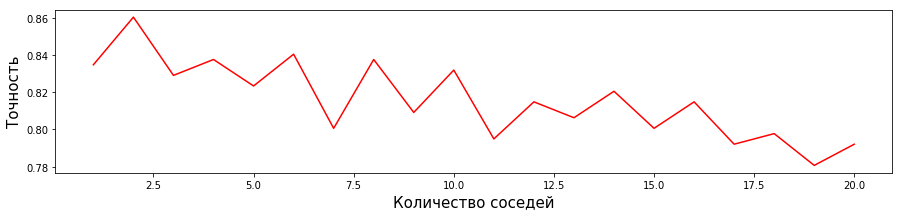

In [7]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

n_features = 34
n_samples = 351
n_classes = 2
n_neighbors = 2
# bad, b - 0, good, g - 1
# ввели исходные данные в массивы X и Y
X = np.empty((n_samples, n_features))
Y = np.empty(n_samples)
with open("ionosphere.data", newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        X[reader.line_num-1] = np.array(row[:len(row)-1])
        Y[reader.line_num-1] = 0 if row[len(row)-1] == 'b' else 1
        
#Размерность массивов и первые две строки обоих        
print("Размерность массива Х:{}\n".format(X.shape))     
print("Размерность массива Y:{}\n".format(Y.shape))
print("Массив X:\n{}".format(list(map('{:.2f}'.format,X[0]))))
print("{}\n".format(list(map('{:.2f}'.format,X[1]))))
print("Массив Y:\n{}\n".format(Y[:2]))

#разделение на тестовую и обучающие выборки
random_state = 14  # так, чтобы получить одинак. рез-ты
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=random_state)
print("Обучающая выборка {} примеров".format(y_train.shape))
print("Тестовая выборка {} примеров".format(y_test.shape))

# используя KNeighborsClassifier ()()(вывести на печать параметры) выполнить обучение fit классификатора;
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
print(knn.fit(X_train, y_train))

# выполнить валидацию predict классификатора, оценить его точность А1 сравнением реальных
# значений тестовой выборки и предсказанных классификатором (вывести на печать в % с округл.
# до 0.0);
# y_valid = knn.predict(X_test) 
# A1 = np.mean(y_valid == y_test) * 100
A1 = knn.score(X_test, y_test) * 100
print("Правильность методом score:\n{:.2f}%\n".format(A1))

# используя модуль cross_val_score библиотеки scikit learn рассчитать среднюю точность А2 на
# тестовой выборке, вывести на печать, сравнить А1 и А2
scores = cross_val_score(knn, X_test, y_test, scoring='accuracy', cv = 3)
A2 = np.mean(scores)*100
print("Точность с cross val на тестовой выборке:\n{:.2f}%\n".format(A2))

# выполнить настройку классификатора выбрать количество соседей n , обеспечивающее
# максимальную точность классификатора на тестовых данных;
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21)) #от 1 до 21 = всего 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors =  n_neighbors)
    scores = cross_val_score (estimator, X, Y, scoring='accuracy', cv=3)
    avg_scores.append(np.mean(scores))

    

%matplotlib inline
import matplotlib.pyplot as plt
x = np.arange(1,21)
y = np.array(avg_scores)
plt.figure(figsize=(15,3))
plt.plot(x, y, color='red')
plt.xlabel("Количество соседей",fontsize = 15)
plt.ylabel("Точность",fontsize = 15)
print("Наилучшая точность {0:.2f}% при количестве соседей = {1} ".format(max(avg_scores),avg_scores.index(max(avg_scores))+1))

# -«перекосить данные» разделить каждый 2й признак на 10. Подтвердить ухудшение точности
# на «перекошенных данных». Выполнить нормализацию, проверить улучшение точности.
#перекосим данные 
X_broken_test = X_test.copy()
# X_broken_test = X_test.copy()
X_broken_test[:,1::2]/=10
X_norm_test=MinMaxScaler().fit_transform(X_broken_test)

print("Исходный массив тестовый:\n{}\n".format(list(map('{:.2f}'.format,X_test[0]))))
print("{}\n".format(list(map('{:.2f}'.format,X_test[1]))))
print("\"Перекошенный\" массив тестовый:\n{}\n".format(list(map('{:.2f}'.format,X_broken_test[0]))))
print("{}\n".format(list(map('{:.2f}'.format,X_broken_test[1]))))
print("Нормализованный массив тестовый:\n{}\n".format(list(map('{:.2f}'.format,X_norm_test[0]))))
print("{}\n".format(list(map('{:.2f}'.format,X_norm_test[1]))))

scores_b = cross_val_score(knn, X_broken_test, y_test, scoring='accuracy', cv = 3)
A_broken = np.mean(scores_b)*100
scores_n = cross_val_score(knn, X_norm_test, y_test, scoring='accuracy', cv = 3)
A_norm = np.mean(scores_n)*100
print("Точность с cross val на тестовой выборке: {:.2f}%".format(A2))
print("Точность с cross val на \"перекошенной\" тестовой выборке: {:.2f}%".format(A_broken))
print("Точность с cross val на нормализованной тестовой выборке: {:.2f}%".format(A_norm))


